### 0. _Import Dependency_
Melakukan _import dependency_ yang diperlukan merupakan langkah awal sebelum melakukan praktikum. Untuk memudahkan mencari _dependency_ apa saja yang telah di-_import_, operasi _import dependency_ dilakukan dalam sebuah _cell_.

#### A. _Install Dependency_
_Install dependency_ tidaklah wajib. Tetapi bisa jadi ada beberapa _dependency_ di bawah ini yang belum terinstall.

In [ ]:
pip install numpy scikit-image matplotlib

#### B. _Import Dependency_

In [1]:
from skimage import color, exposure, filters, io, morphology, util
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

### 1. _Point Processing_
_Point Processing_ merupakan operasi pemrosesan citra yang melibatkan satu piksel saja. Selanjutnya akan dibahas beberapa teknik _point processing_.

#### A. _Image Negative_
$G_{baru} = 255 - G_{lama}$

In [2]:
pathFromCurrent = 'Lab 1 - Images/Lab 1 - Images/'
def getPath(fileName):
    return pathFromCurrent + fileName

Lab 1 - Images/Lab 1 - Images/tire.jpg


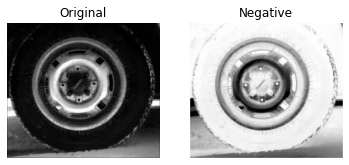

In [3]:
print(getPath('tire.jpg'))
i1 = io.imread(getPath('tire.jpg'))
i2 = 255 - i1

## Gambar 1
plt.subplot(1,2,1)
plt.imshow(i1)
plt.title('Original')
plt.axis('off')

## Gambar 2
plt.subplot(1,2,2)
plt.imshow(i2)
plt.title('Negative')
plt.axis('off')

plt.show()

#### B. _Log Processing_
$s = c \cdot log(l + r)$

$s$ = citra yang dihasilkan oleh _log processing_ \
$c$ = konstanta \
$r$ = citra yang akan ditransformasi
- Memetakan suatu citra dengan range warna sempit menjadi lebih lebar citra _output_-nya.
- Tujuannya untuk ekspansi nilai piksel gelap dan kompresi nilai piksel terang.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


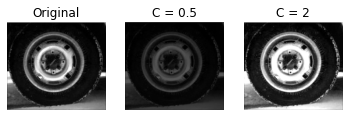

In [4]:
a = i1/255
c1 = 0.5
c2 = 2
f1 = c1*np.log(1 + (a))
f2 = c2*np.log(1 + (a))

## Gambar 1
plt.subplot(1,3,1)
plt.imshow(i1)
plt.title('Original')
plt.axis('off')

## Gambar 2
plt.subplot(1,3,2)
plt.imshow(f1)
plt.title('C = 0.5')
plt.axis('off')

## Gambar 3
plt.subplot(1,3,3)
plt.imshow(f2)
plt.title('C = 2')
plt.axis('off')

plt.show()

#### C. _Gamma Transformation_
$s = c \cdot r^{p}$

$s$ = citra hasil _gamma transformation_ \
$c$ = konstanta \
$p$ = konstanta \
$r$ = citra masukan

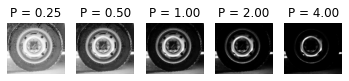

In [5]:
a = i1/255
c = 1
p = [2 ** (i - 2) for i in range(5)]
f = [c * (a ** p[i]) for i in range(5)]
for i in range(len(p)):
    plt.subplot(2,len(p),i+1)
    plt.imshow(f[i])
    plt.title('P = %.2f' % p[i])
    plt.axis('off')
plt.show()

##### D. _Contrast Streching_
- _Contrast stretching_ mengembangkan range level intensitas piksel yang tadinya terbatas sehingga memiliki range intensitas penuh.
- Contoh fungsi yang dapat digunakan adalah citra masukan yang _gray level_-nya tidak penuh dari $0-255$ (_low contrast_) diubah menjadi citra yang _gray level_-nya berkisar penuh dari $0-255$ (_high contrast_)

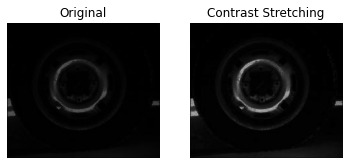

In [6]:
i3 = io.imread(getPath('dark_tire.jpg'))
mn = min(i3.flatten())
mx = max(i3.flatten())
b = int(np.floor(255 / (mx-mn)))
i3_cs = (i3 - mn) * b

## Gambar 1
plt.subplot(1,2,1)
plt.imshow(i3)
plt.title('Original')
plt.axis('off')

## Gambar 2
plt.subplot(1,2,2)
plt.imshow(i3_cs)
plt.title('Contrast Stretching')
plt.axis('off')

plt.show()

#### E. _Image Histogram_
Histogram merupakan suatu teknik domain spasial yang mampu memberikan deskripsi global pada tampilan citra.

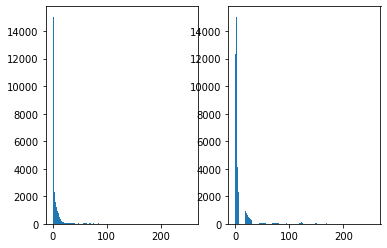

In [7]:
## Gambar 1
gray = util.img_as_ubyte(color.rgb2gray(i3))
plt.title('Original Dark Tire Image')
plt.subplot(1,2,1)
plt.hist(gray.flatten(), 256, range=(0,256))

## Gambar 2
gray2 = util.img_as_ubyte(color.rgb2gray(i3_cs))
plt.subplot(1,2,2)
plt.hist(gray2.flatten(), 256, range=(0,256))

plt.show()

#### F. _Histogram Equalization_ 
- Mengubah pemetaan _gray level_ agar sebarannya (kontrasnya) lebih menyebar pada kisaran $0-255$
- _Histogram equalization_ digunakan untuk mengubah bentuk histogram agar pemetaan _gray level_ pada citra juga berubah.

/home/jehiannormansaviero/.local/lib/python3.6/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


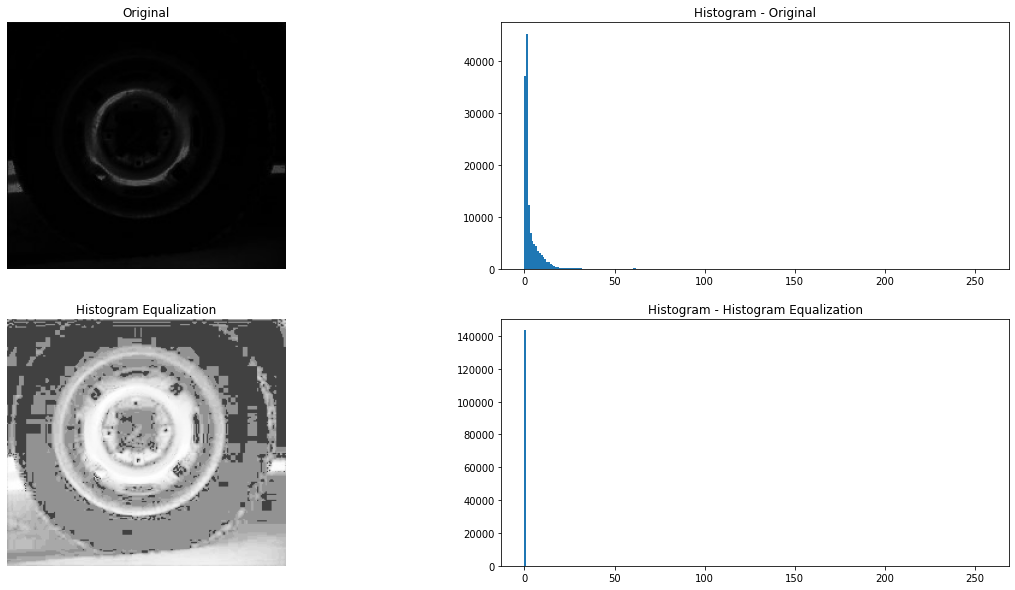

In [8]:
eq_i3 = exposure.equalize_hist(i3)

plt.subplots(figsize=(20,10))
## Gambar 1
plt.subplot(2,2,1)
plt.imshow(i3)
plt.title('Original')
plt.axis('off')

## Histogram Gambar 1
plt.subplot(2,2,2)
plt.hist(i3.flatten(), 256, range=(0,256))
plt.title('Histogram - Original')

## Gambar 2
plt.subplot(2,2,3)
plt.imshow(eq_i3)
plt.title('Histogram Equalization')
plt.axis('off')

## Histogram Gambar 2
plt.subplot(2,2,4)
plt.hist(eq_i3.flatten(), 256, range=(0,256))
plt.title('Histogram - Histogram Equalization')

# hist, bins = np.histogram(eq_i3.flatten(), 256, range=(0,256))
# cdf = hist.cumsum()
# cdf_normalized = cdf * hist.max() / cdf.max()

# plt.plot(cdf_normalized)
plt.show()

#### G. _Image Subtraction_
Dilakukan jika ingin mengambil bagian tertentu saja dari citra.

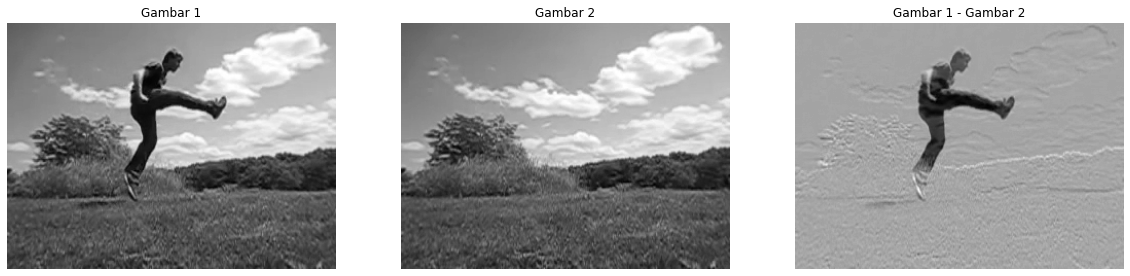

In [9]:
i1 = io.imread(getPath('original.jpg'))
i2 = io.imread(getPath('background.jpg'))
i_subs = np.subtract(i1, i2, dtype='int16')

plt.subplots(figsize=(20,20))

## Gambar 1
plt.subplot(1,3,1)
plt.imshow(i1, cmap='gray')
plt.title('Gambar 1')
plt.axis('off')

## Gambar 2
plt.subplot(1,3,2)
plt.imshow(i2, cmap='gray')
plt.title('Gambar 2')
plt.axis('off')

## Gambar 3
plt.subplot(1,3,3)
plt.imshow(i_subs, cmap='gray')
plt.title('Gambar 1 - Gambar 2')
plt.axis('off')

plt.show()

### 2. _Mask Processing_
- _Mask processing_ sering juga disebut dengan **_image filtering_**.
- Operasi lain ini mempertimbangkan intensitas piksel dalam _neighborhood_ dan koefisien filter yang berdimensi sama dengan _neighborhood_.
- Filter pada dasarnya adalah sebuah metode untuk meredam dan menghilangkan _noise_ pada citra digital.
- Terdapat 2 jenis filter spasial: **_smoothing filter_** dan **_sharpening filter_**.

#### A. _Smoothing Filter_
- _Smoothing_ digunakan untuk mengaburkan citra dan mereduksi _noise_.
- Biasa dilakukan saat _pre-processing_ citra.
- Efek positif: Mereduksi _noise_ dan detail yang tidak relevan dalam suatu citra.
- Efek negatif: Pengaburan _edge_.
- Bisa dilakukan dengan menggunakan linear filter ataupun non linear filter.

##### **1) Linear Filter**
Metode yang digunakan: **_korelasi_** atau **_konvolusi_** (perkalian setiap piksel di lingkungan dengan koefisien yang sesuai dan menjumlahkan hasil untuk mendapatkan respon pada setiap titik $(x,y)$)

Berikut beberapa macam filter linear yang dibahas pada Lab ini:
- **_Average Filter_** \
Mengganti intensitas tiap piksel dalam citra dengan rata-rata intensitas pada _neighborhood_.

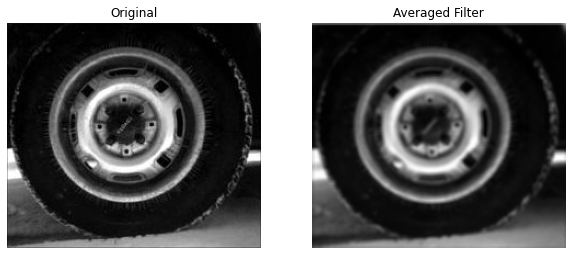

In [37]:
i_tire = io.imread(getPath('tire.jpg'))
gray = color.rgb2gray(i_tire)
fi = filters.rank.mean(gray,selem=morphology.square(4))

plt.subplots(figsize=(10,10))
## Gambar 1
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.axis('off')

## Gambar 2
plt.subplot(1,2,2)
plt.imshow(fi, cmap='gray',vmin=0, vmax=255)
plt.title('Averaged Filter')
plt.axis('off')

plt.show()

- **_Gaussian Filter_** \
Mengganti intensitas tiap piksel dalam citra dengan hasil _image filtering_ dari operasi konvolusi antara intensitas tiap piksel dalm citra dengan distribusi _Gaussian_. \
Contoh langkah-langkah diterapkannya _Gaussian Filter_ pada suatu gambar berwarna:
    1. Gambar diperkecil hingga $5 \times 5$ dan diekstraksi/direpresentasikan ke dalam matriks
    
    $$\begin{bmatrix}
    123 & 123 & 156 & 156 & 106 \\
    115 & 123 & 177 & 154 & 101 \\
    121 & 90  & 126 & 113 & 146 \\
    106 & 77  & 110 & 118 & 174 \\
    104 & 56  & 128 & 176 & 110
    \end{bmatrix}$$
    
    2. Menggunakan penentuan filter/_mask_ yang ditentukan dengan distribusi Gaussian 2D. Contohnya menggunakan kernel berukuran $3 \times 3$.
    
    $$\begin{bmatrix}
    0.075 & 0.124 & 0.075 \\
    0.124 & 0.204 & 0.124 \\
    0.075 & 0.124 & 0.075
    \end{bmatrix}$$
    
    3. Melakukan _image filtering_ dengan menerapkan operasi konvolusi sebagai berikut:
    $h(m,n) = (123 \times 0.075) + (123 \times 0.124) + (156 \times 0.075) + (115 \times 0.124) + (123 \times 0.204) + (177 \times 0.124) + (121 \times 0.075) + (90 \times 0.124) + (126 + 0.075)$ \
    sehingga menghasilkan:
    
    $$\begin{bmatrix}
    0   & 0   & 0   & 0   & 0 \\
    0   & 127 & 142 & 139 & 0 \\
    0   & 112 & 122 & 133 & 0 \\
    0   & 96  & 111 & 133 & 0 
    0   & 0   & 0   & 0   & 0
    \end{bmatrix}$$

Contoh penerapan kode _Gaussian Filtering_ pada gambar lain:

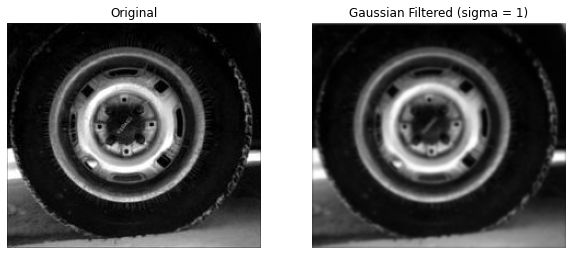

In [39]:
fi = util.img_as_ubyte(filters.gaussian(gray, sigma=1))

plt.subplots(figsize=(10,10))
## Gambar 1
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.axis('off')

## Gambar 2
plt.subplot(1,2,2)
plt.imshow(fi, cmap='gray')
plt.title('Gaussian Filtered (sigma = 1)')
plt.axis('off')

plt.show()

##### **2) Non Linear Filter** 
- Responnya didasarkan pada pengurutan (ranking) dari intensitas piksel-piksel yang dilingkup oleh filter.
- Selanjutnya, intensitas piksel pada pusat filter diganti dengan intensitas hasil pengurutan.
- Filter _non-linear_ memiliki lebih banyak keunggulan dibandingkan filter _linear_ dengan ukuran filter yang sama.

Berikut beberapa macam filter nonlinear yang dibahas pada Lab ini:
- **Median Filter**
    - Mengganti intensitas piksel pada pusat filter dengan median dari intensitas _neighborhood_.
    - Efektif untuk menghilangkan _impulse noise/salt-pepper noise_.
    - Intensitas piksel dalam _neighborhood_ diurutkan &#8594; menentukan nilai media &#8594; mengganti intensitas piksel pada pusat _neighborhood_ dengan median.

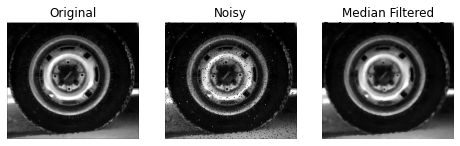

In [40]:
noise = util.img_as_ubyte(util.random_noise(gray,mode='s&p',salt_vs_pepper=0.02))
fi = filters.rank.median(noise, selem=morphology.square(4))

plt.subplots(figsize=(8,8))
## Gambar 1
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.axis('off')

## Gambar 2
plt.subplot(1,3,2)
plt.imshow(noise, cmap='gray')
plt.title('Noisy')
plt.axis('off')

## Gambar 3
plt.subplot(1,3,3)
plt.imshow(fi, cmap='gray')
plt.title('Median Filtered')
plt.axis('off')

plt.show()

- **Minimum Filter**
    - Mengganti intensitas piksel pada pusat filter dengan minimum dari intensitas _neighborhood_.
    - Biasa digunakan untuk menghilangkan _positive outlier noise_.

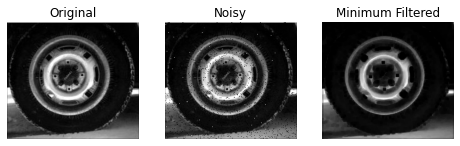

In [41]:
fi = filters.rank.minimum(gray, selem=morphology.square(4))

plt.subplots(figsize=(8,8))
## Gambar 1
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.axis('off')

## Gambar 2
plt.subplot(1,3,2)
plt.imshow(noise, cmap='gray')
plt.title('Noisy')
plt.axis('off')

## Gambar 3
plt.subplot(1,3,3)
plt.imshow(fi, cmap='gray')
plt.title('Minimum Filtered')
plt.axis('off')

plt.show()

- **Maximum Filter**
    - Mengganti intensitas piksel pada pusat filter dengan maksimum dari intensitas _neighborhood_.
    - Biasa digunakan untuk menghilangkan _negative outlier noise_.

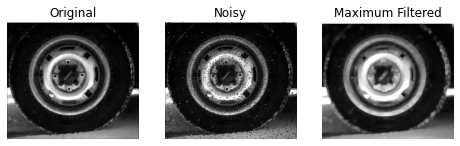

In [44]:
fi = filters.rank.maximum(gray, selem=morphology.square(4))

plt.subplots(figsize=(8,8))
## Gambar 1
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.axis('off')

## Gambar 2
plt.subplot(1,3,2)
plt.imshow(noise, cmap='gray')
plt.title('Noisy')
plt.axis('off')

## Gambar 3
plt.subplot(1,3,3)
plt.imshow(fi, cmap='gray')
plt.title('Maximum Filtered')
plt.axis('off')

plt.show()

#### B. _Sharpening Filter_
- _Sharpening_ digunakan untuk menonjolkan detail dalam citra atau untuk mempertajam detail dalam citra atau untuk mempertajam detail yang kabur.
- Biasa dilakukan saat _pre-processing_ citra.
- Kebalikan dari _smoothing_ yang dilakukan dengan rata-rata (dengan integrasi), _sharpenign_ dapat dilakukan dengan **derivatif** (penurunan).
    - **Robert, Prewitt, Sobel (_Edge Detection_)** \
      **_Edge Detection_** menghasilkan tepi-tepi dari objek citra. Suatu titik $(x,y)$ dikatakan sebagai tepi (_edge_) dari suatu citra apabila mempunyai perbedaan yang tinggi dengan tetangganya.
        - **Roberts**: Teknik diferensial pada arah horizontal dan diferensial pada arah vertikal, dengan ditambahkan proses konvensi biner setelah dilakukan diferensial. Kernal filter yang digunakan dalam metode Roberts:
        $H = \begin{bmatrix}-1 & 1\end{bmatrix}\text{ dan }H = \begin{bmatrix}-1 \\ 1\end{bmatrix}$
        - **Prewitt**: Pengembangan metode Robert dengan menggunakan filter HPF (_High Pass Filter_) yang diberi satu angka nol penyangga. Metode ini mengambil prinsip dari fungsi laplacian yang dikenal sebagai fungsi untuk membangkitkan HPF. Kernel _filter_ yang digunakan dalam metode Prewitt:
        $$ H = \begin{bmatrix}
        -1 & 0 & 1 \\
        -1 & 0 & 1 \\
        -1 & 0 & 1
        \end{bmatrix} \text{ dan } H = \begin{bmatrix}
        -1 & -1 & -1 \\
        0  & 0  & 0  \\
        1  & 1  & 1
        \end{bmatrix}$$
        - **Sobel**: Pengembangan metode Sobel dengan menggunakan filter HPF (_High Pass Filter_) yang diberi suatu satu angka nol penyangga. Kelebihannya adalah kemampuan untuk mengurangi _noise_ sebelum melakukan perhitungan deteksi tepi. Kernal _filter_ yang digunakan dalam metode Sobel:
        $$ H = \begin{bmatrix}
        -1 & 0 & 1 \\
        -2 & 0 & 2 \\
        -1 & 0 & 1
        \end{bmatrix} \text{ dan } H = \begin{bmatrix}
        -1 & -2 & -1 \\
        0  & 0  & 0  \\
        1  & 2  & 1
        \end{bmatrix}$$

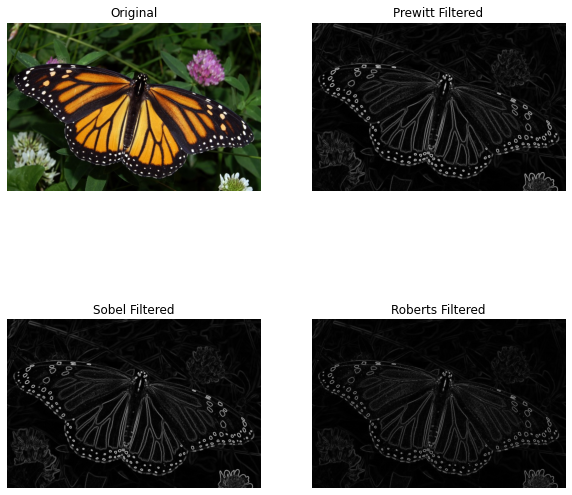

In [49]:
butterfly = io.imread(getPath('butterfly.jpg'))
butterfly_gray = color.rgb2gray(butterfly)
ed1 = util.img_as_ubyte(filters.prewitt(butterfly_gray))
ed2 = util.img_as_ubyte(filters.sobel(butterfly_gray))
ed3 = util.img_as_ubyte(filters.roberts(butterfly_gray))

plt.subplots(figsize=(10,10))

## Gambar 1
plt.subplot(2,2,1)
plt.imshow(butterfly, cmap='gray')
plt.title('Original')
plt.axis('off')

## Gambar 2
plt.subplot(2,2,2)
plt.imshow(ed1, cmap='gray')
plt.title('Prewitt Filtered')
plt.axis('off')

## Gambar 3
plt.subplot(2,2,3)
plt.imshow(ed2, cmap='gray')
plt.title('Sobel Filtered')
plt.axis('off')

## Gambar 4
plt.subplot(2,2,4)
plt.imshow(ed3, cmap='gray')
plt.title('Roberts Filtered')
plt.axis('off')

plt.show()

##### Sharpenig Image

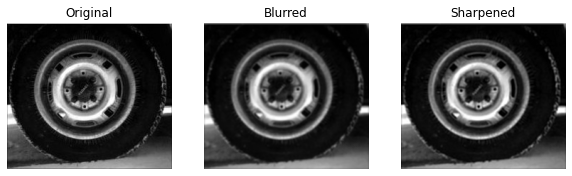

In [61]:
tire_gray = color.rgb2gray(i_tire)
fi = filters.rank.mean(gray, selem=morphology.square(3))
sh = [filters.unsharp_mask(fi, radius=x) for x in range(1,7)]

plt.subplots(figsize=(10,10))
## Gambar 1
plt.subplot(1,3,1)
plt.imshow(i_tire, cmap='gray')
plt.title('Original')
plt.axis('off')

## Gambar 2
plt.subplot(1,3,2)
plt.imshow(fi, cmap='gray')
plt.title('Blurred')
plt.axis('off')

## Gambar 3
plt.subplot(1,3,3)
plt.imshow(sh[0], cmap='gray')
plt.title('Sharpened')
plt.axis('off')

plt.show()